在深度学习训练中，经常使用梯度下降法来优化损失函数，使得损失函数最小。
在调参过程中，发现不同的初始化训练参数loss的收敛速度不一样，比如正态分布初始化有时就要比全0初始化要好。另外，学习率的大小也是一个重要的超参数。
下面通过一两个极简化的例子来感受一下为何会有这种现象。

 梯度下降法：
    $\theta ^{k+1}$ = $\theta ^{k}$ -$\eta \frac{\partial f(\theta)}{\partial \theta}$ 

## 1、举个简单例子，说明合适的选取初始值和学习率能加速损失函数收敛

损失函数：
 $f(\theta)$ = $\theta ^{2}$

目标：选取合适的初始值和学习率，利用梯度下降法，快速得到函数最小值

 梯度：$\frac{\partial f(\theta)}{\partial \theta} = 2\theta$     
 学习率: $\eta$

参数更新公式：$\theta ^{k+1}$ = $\theta ^{k}$ -$\eta 2\theta ^{k}$ = $\theta ^{k}(1-2\eta)$

假设初始值$\theta ^{0} = 1$，学习率$\eta = 0.5$。当损失函数小于$\sigma = 1E^{4}$时认为收敛了，停止更新

迭代过程如下：

$\theta ^{0} = 1$, $f(\theta ^{0}) = 1 > \sigma$ 继续更新

$\theta ^{1} = 1\times(1-2\times0.5)$, $f(\theta ^{1}) = 0 < \sigma$ 停止更新

只更新了一次参数就停止了！

下面通过简单的程序演示刚才的过程

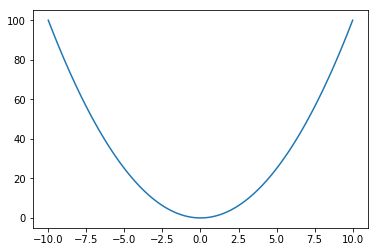

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plot_x=np.linspace(-10,10,100)   #在-10到10之间等距的生成100个数
plot_y=plot_x**2   # 根据x来生成y
plt.plot(plot_x,plot_y)
plt.show()

In [4]:
###定义一个计算梯度的函数dJ
def dJ(x):
    return 2*x

###定义一个求函数值的函数J
def J(x):
    try:
        return x**2
    except:
        return float('inf')


In [5]:
x=1							#选取一个起始点
eta=0.5						    #学习率
epsilon=1e-4				    #用来判断是否到达函数的最小值点的条件
history_x=[x]                   #用来记录使用梯度下降法走过的点的X坐标
while True:
    gradient=dJ(x)				#梯度（导数）
    last_x=x
    x=x-eta*gradient
    history_x.append(x)
    if (abs(J(last_x)-J(x)) <epsilon):		#用来判断是否逼近最低点
        break


[1, 0.0, 0.0]


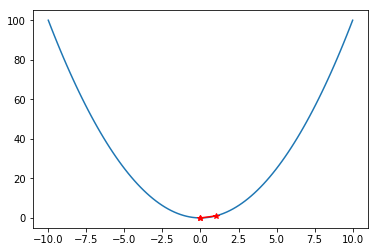

In [23]:
print(history_x)	        #打印到达最低点时x的值
plt.plot(plot_x,plot_y)     
plt.plot(np.array(history_x),J(np.array(history_x)),color='r',marker='*')   #绘制x的轨迹
plt.show()

## 第二个简单例子，参数初始值和学习率选的不够好，损失函数难以收敛

损失函数：
 $f(\theta)$ = $\theta ^{2} - 2\theta$

目标：选取不合适的初始值和学习率，使得损失函数不收敛

 梯度：$\frac{\partial f(\theta)}{\partial \theta} = 2（\theta - 1）$     
 学习率: $\eta$

参数更新公式：$\theta ^{k+1}$ = $\theta ^{k}(1-2\eta) + 2\eta$

假设初始值$\theta ^{0} = 1$，学习率$\eta = 0.8$。当损失函数小于$\sigma = 1E^{4}$时认为收敛了，停止更新

迭代过程如下：

$\theta ^{0} = 1$, $f(\theta ^{0}) = -1 > \sigma$ 继续更新

$\theta ^{1} = 1\times(1-2\times0.8) + 2\times0.8 = 1$, 这里问题来了，参数$\theta$还是1，根本没有得到更新。我们选取的初始值和学习率恰好导致参数一成不变，那么我们的损失函数一直等于-1，距离我们的判断值$\sigma$还有很大距离

下面通过程序来观察这个过程

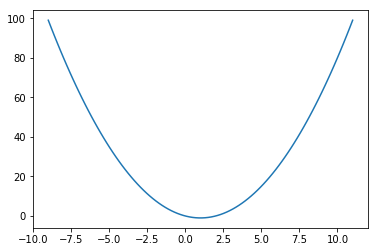

In [8]:
import numpy as np
import matplotlib.pyplot as plt
plot_x=np.linspace(-9,11,100)   #在-9到11之间等距的生成100个数
plot_y=plot_x**2 - 2*plot_x	   # 同时根据plot_x来生成plot_y
plt.plot(plot_x,plot_y)
plt.show()

In [9]:
###定义一个求梯度的函数dJ
def dJ(x):
    return 2*x - 2

###定义一个求函数值的函数J
def J(x):
    try:
        return x**2 - 2*x
    except:
        return float('inf')

In [10]:
x=1							#选取一个起始点
eta=0.8						    #学习率
epsilon=-1.5				    #用来判断是否到达二次函数的最小值点的条件
history_x=[x]                   #用来记录使用梯度下降法走过的点的X坐标
for i in range(10):
    gradient=dJ(x)				#梯度（导数）
    last_x=x
    x=x-eta*gradient
    history_x.append(x)
    if (abs(J(last_x)-J(x)) <epsilon):		#用来判断是否逼近最低点
        break

[1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


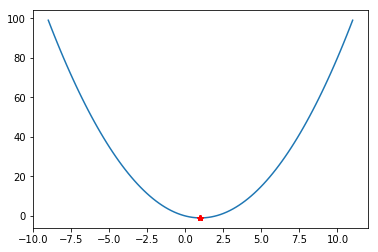

In [11]:
print(history_x)	        #打印到达最低点时x的值
plt.plot(plot_x,plot_y)     
plt.plot(np.array(history_x),J(np.array(history_x)),color='r',marker='*')   #绘制x的轨迹
plt.show()

可以看到参数位置没有变化，损失函数也没减少，这次的参数初始化和学习率选取非常失败。

## 总结：以上两个例子只为说明为什么会参数初始化以及学习率的选择会对训练影响很大，在实际的例子中，很少会出现一次更新到位或永不更新的情况，更多的情况是影响甚微。